In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('../../data/maildata.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category    0
Message     0
dtype: int64

In [4]:
print(df.columns)

Index(['Category', 'Message'], dtype='object')


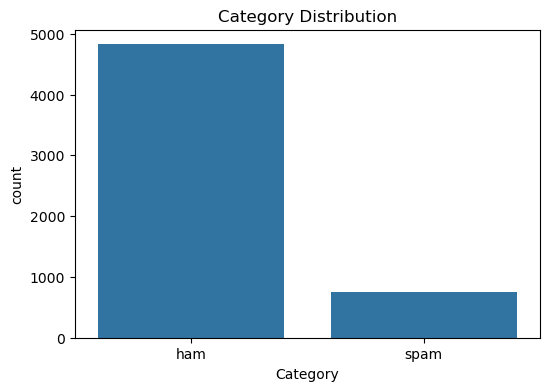

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title("Category Distribution")
plt.show()

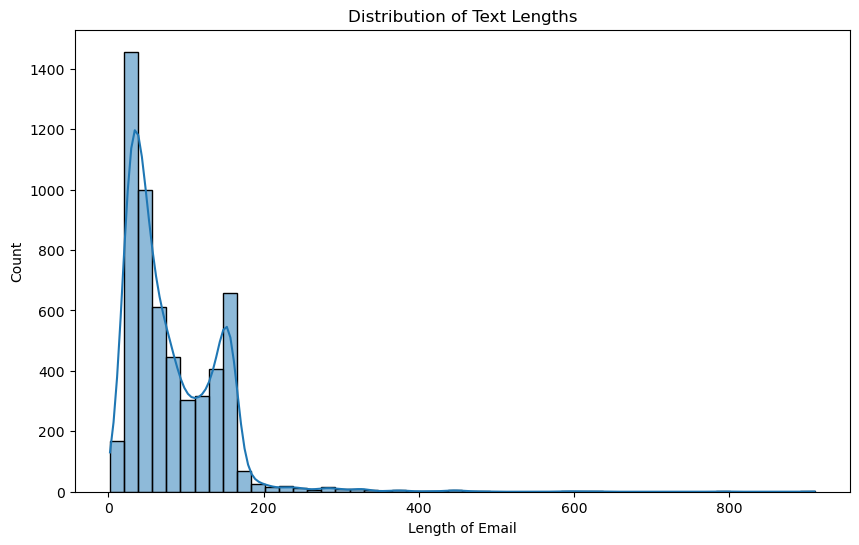

In [6]:
df['text_length'] = df['Message'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], kde=True, bins=50)
plt.title("Distribution of Text Lengths")
plt.xlabel("Length of Email")
plt.ylabel("Count")
plt.show()

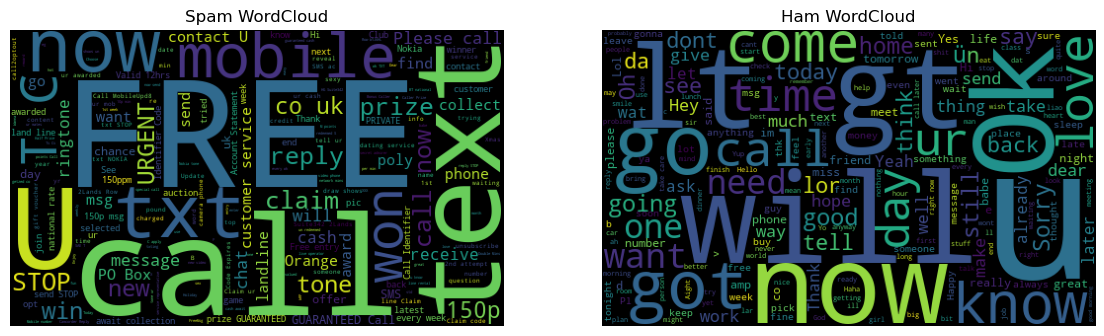

In [7]:
spam_words = ' '.join(list(df[df['Category'] == 'spam']['Message']))
ham_words = ' '.join(list(df[df['Category'] == 'ham']['Message']))

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title("Spam WordCloud")
wc = WordCloud(width=500, height=300).generate(spam_words)
plt.imshow(wc)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Ham WordCloud")
wc = WordCloud(width=500, height=300).generate(ham_words)
plt.imshow(wc)
plt.axis('off')

plt.show()


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r'\d+', '', text)      
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [9]:
df['clean_text'] = df['Message'].apply(clean_text)
df.head()

,Category,Message,text_length,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [10]:
df.to_csv('../../data/maildata_cleaned.csv', index=False)
